In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from WindPy import w
import empyrical
import datetime as dt
%matplotlib inline

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\empyrical\utils.py:32: UserWarning: Unable to import pandas_datareader. Suppressing import error and continuing. All data reading functionality will raise errors; but has been deprecated and will be removed in a later version.
  warnings.warn(msg)


In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
def metric(ret):
    print(empyrical.annual_return(ret))
    print(empyrical.annual_volatility(ret))
    print(empyrical.max_drawdown(ret))
    print(empyrical.sharpe_ratio(ret))

In [51]:
start_date = '2017-01-01'

In [52]:
end_date = dt.datetime.today().strftime('%Y-%m-%d')

# 计算行业基金收益率

In [53]:
sfund = pd.read_excel('../data/嘉实基金池.xlsx', sheet_name='股票')

In [54]:
sfund

,code,name
0,000751.OF,嘉实新兴产业
1,070002.OF,嘉实增长


In [55]:
data = w.wsd(sfund['code'].tolist(), 'nav_adj', start_date, end_date)

In [56]:
sfund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [57]:
sfund_nav_ret = sfund_nav.pct_change()

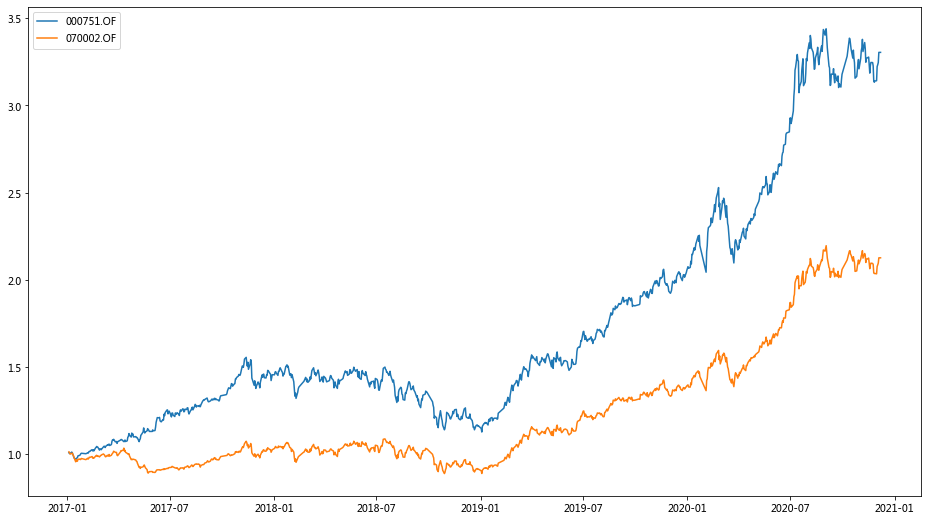

In [58]:
(1 + sfund_nav_ret).cumprod().plot(figsize=(16, 9))

In [59]:
sfund_pf_ret = sfund_nav_ret.mean(axis=1)

# 计算债券基金收益率

In [60]:
bfund = pd.read_excel('../data/嘉实基金池.xlsx', sheet_name='债券')

In [61]:
data = w.wsd(bfund['code'].tolist(), 'nav_adj', start_date, end_date)

In [62]:
bfund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [63]:
bfund_ret = bfund_nav.pct_change()

In [64]:
bfund_pf_ret = bfund_ret.mean(axis=1)

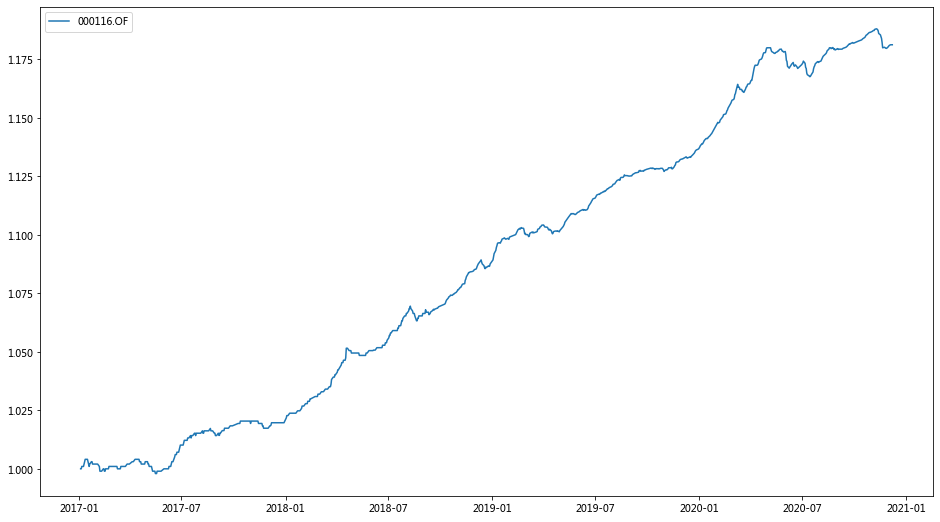

In [65]:
(1 + bfund_ret).cumprod().plot(figsize=(16, 9))

# 计算组合收益率

In [66]:
pf_ret_595 = 0.95 * bfund_pf_ret + 0.05 * sfund_pf_ret
pf_ret_19 = 0.9 * bfund_pf_ret + 0.1 * sfund_pf_ret
pf_ret_28 = 0.8 * bfund_pf_ret + 0.2 * sfund_pf_ret
pf_ret_55 = 0.5 * bfund_pf_ret + 0.5 * sfund_pf_ret
pf_ret_46 = 0.6 * bfund_pf_ret + 0.4 * sfund_pf_ret
pf_ret_37 = 0.7 * bfund_pf_ret + 0.3 * sfund_pf_ret
pf_ret_1585 = 0.85 * bfund_pf_ret + 0.15 * sfund_pf_ret

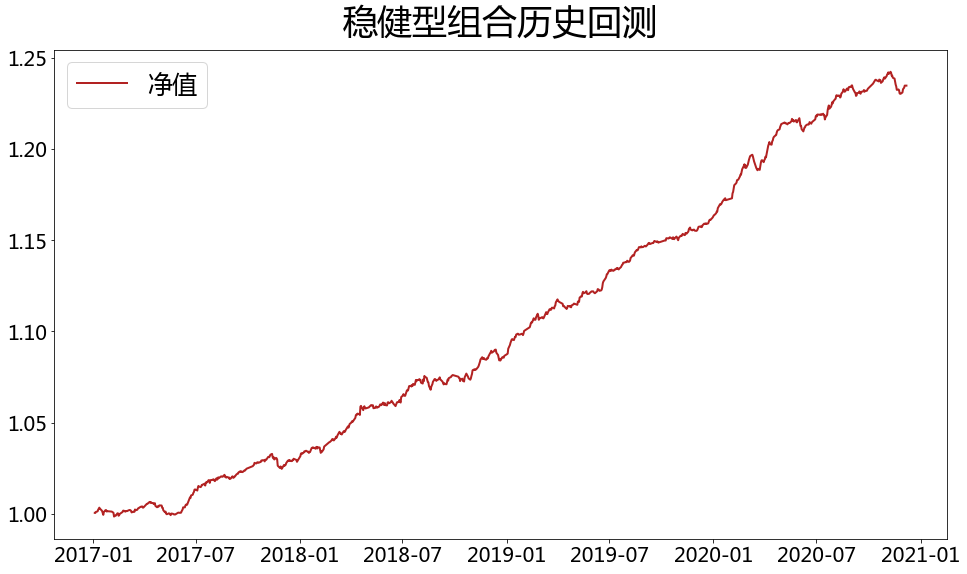

In [67]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((1 + pf_ret_595).cumprod(), label='净值', color='firebrick', linewidth=2)
# ax.plot((1 + pf_ret_55).cumprod(), label='平衡型', color='blue')
# ax.plot((1 + pf_ret_82).cumprod(), label='80/20组合', color='black')

ax.legend(fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

_ = ax.set_title('稳健型组合历史回测', fontsize=35, y=1.02)

# 拼接组合

In [82]:
pf_ret = pd.Series(0, index=pd.to_datetime(pf_ret_19.index))
# first cut
# index = pf_ret[pf_ret.index < '2015-06-01'].index
# pf_ret.loc[index] = pf_ret_19.loc[index]
# second cut
# index = pf_ret[(pf_ret.index >= '2015-06-01') & (pf_ret.index < '2017-02-01')].index
# pf_ret.loc[index] = pf_ret_595.loc[index]
# third cut
index = pf_ret[(pf_ret.index < '2018-03-01')].index
pf_ret.loc[index] = sfund_pf_ret.loc[index]
# fouth cut
index = pf_ret[(pf_ret.index >= '2018-03-01') & (pf_ret.index < '2019-01-01')].index
pf_ret.loc[index] = pf_ret_55.loc[index]
# fifth cut
index = pf_ret[(pf_ret.index >= '2019-01-01')].index
pf_ret.loc[index] = sfund_pf_ret.loc[index]

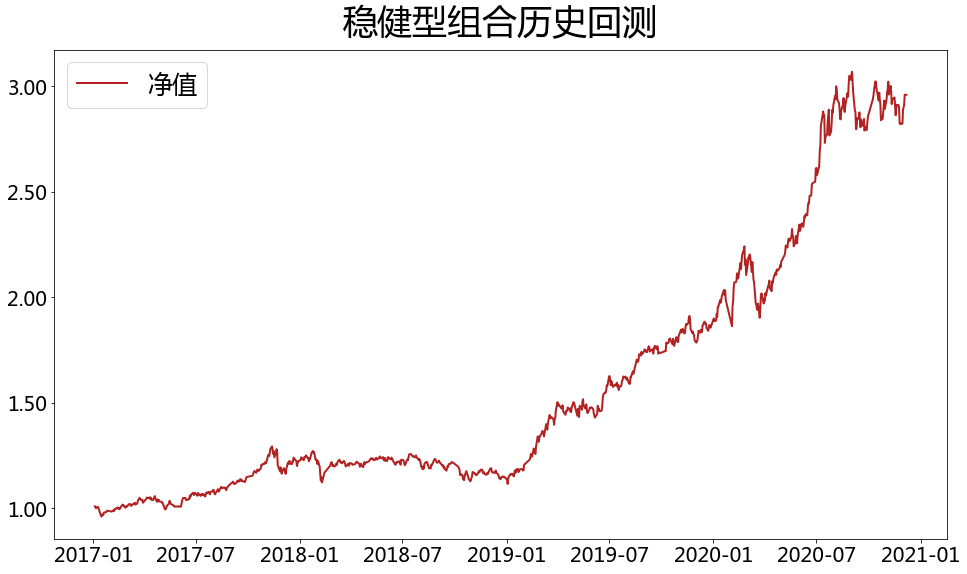

In [83]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((1 + pf_ret).cumprod(), label='净值', color='firebrick', linewidth=2)
# ax.plot((1 + pf_ret_55).cumprod(), label='平衡型', color='blue')
# ax.plot((1 + pf_ret_82).cumprod(), label='80/20组合', color='black')

ax.legend(fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

_ = ax.set_title('稳健型组合历史回测', fontsize=35, y=1.02)

In [84]:
metric(pf_ret)

0.33116445320222754
0.18089073770499106
-0.15085341553418333
1.674441079359944


In [85]:
pf_ret.to_excel('C:/Users/zhangyang01/Desktop/9010.xlsx')

# 持有一年收益区间与概率

In [138]:
ret_1y = pf_ret.rolling(243).apply(lambda x: empyrical.cum_returns_final(x))

In [139]:
ret_1y.min()

0.03208111330911523

In [140]:
ret_1y.median()

0.08422480392206477

In [141]:
ret_1y.max()

0.17515745298023155

In [142]:
ret_1y[ret_1y < 0.02].size / ret_1y.dropna().size

0.0

In [143]:
ret_1y[(ret_1y >= 0.02) & (ret_1y < 0.04)].size / ret_1y.dropna().size

0.05674740484429066

In [144]:
ret_1y[(ret_1y >= 0.04) & (ret_1y < 0.06)].size / ret_1y.dropna().size

0.2041522491349481

In [145]:
ret_1y[(ret_1y >= 0.06) & (ret_1y < 0.08)].size / ret_1y.dropna().size

0.21107266435986158

In [146]:
ret_1y[(ret_1y >= 0.08) & (ret_1y < 0.10)].size / ret_1y.dropna().size

0.1916955017301038

In [147]:
ret_1y[(ret_1y > 0.1)].size / ret_1y.dropna().size

0.33633217993079584

In [148]:
pf_ret.to_excel('C:/Users/zhangyang01/Desktop/nav.xlsx')

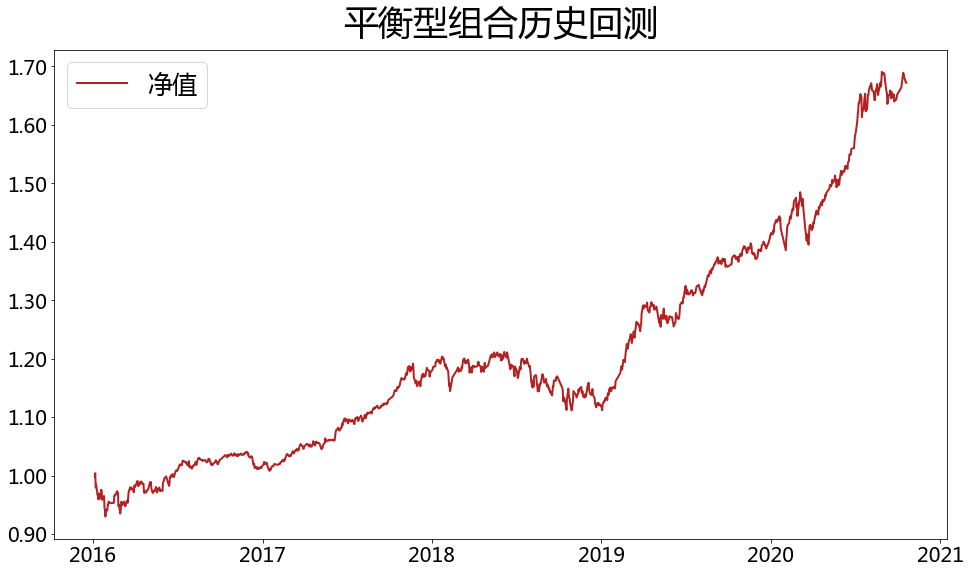

In [224]:
fig, ax = plt.subplots(figsize=(16, 9))

# ax.plot((1 + pf_ret_28).cumprod(), label='净值', color='firebrick', linewidth=2)
ax.plot((1 + pf_ret_46).cumprod(), label='净值', color='firebrick', linewidth=2)
# ax.plot((1 + pf_ret_82).cumprod(), label='80/20组合', color='black')

ax.legend(fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

_ = ax.set_title('平衡型组合历史回测', fontsize=35, y=1.02)

In [225]:
(1 + pf_ret_46).cumprod().tail()

2020-10-14    1.686617
2020-10-15    1.682730
2020-10-16    1.679229
2020-10-19    1.671922
2020-10-20    1.671922
dtype: float64

In [226]:
metric(pf_ret_46)

0.11748629488528706
0.0815887911590198
-0.08266790788740906
1.4037656229899387


In [244]:
pf_ret_28.index = pd.to_datetime(pf_ret_28.index)
pf_ret_46.index = pd.to_datetime(pf_ret_46.index)

In [245]:
mret_df = pd.DataFrame()
mret_df['28'] = pf_ret_28.resample('M').apply(lambda x: empyrical.cum_returns_final(x))
mret_df['46'] = pf_ret_46.resample('M').apply(lambda x: empyrical.cum_returns_final(x))

In [250]:
mret_df[mret_df['28'] > 0].shape[0] / mret_df.shape[0]

0.7586206896551724

In [251]:
mret_df[mret_df['46'] > 0].shape[0] / mret_df.shape[0]

0.7413793103448276

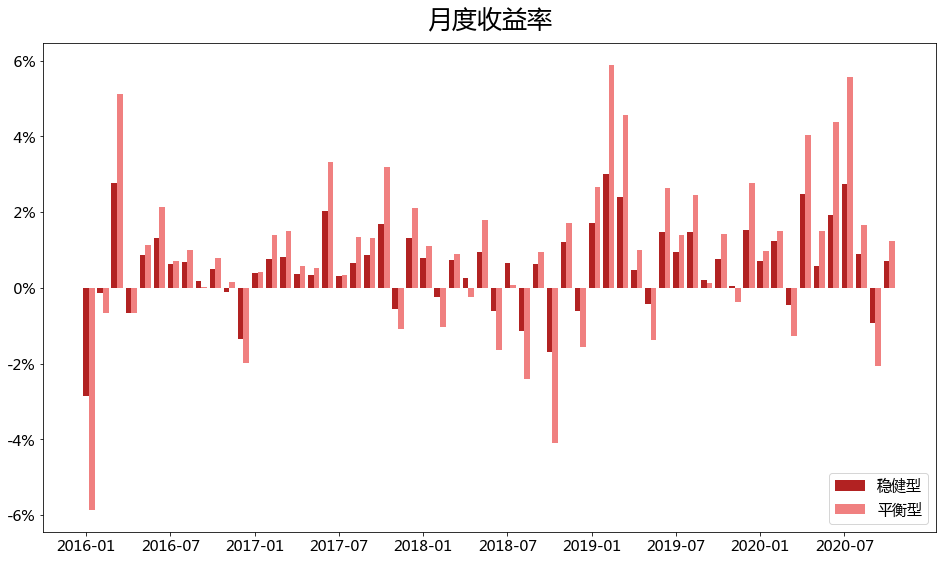

In [273]:
fig, ax = plt.subplots(figsize=(16, 9))

x = np.arange(mret_df.shape[0])

ax.bar(x, mret_df['28'], width=0.4, align='center', label='稳健型', color='firebrick')
ax.bar(x + 0.4, mret_df['46'], width=0.4, align='center', label='平衡型', color='lightcoral')

sx = range(0, mret_df.shape[0], 6)
ax.set_xticks(sx)
ax.set_xticklabels([e.strftime('%Y-%m') for e in mret_df.index[sx]])

ax.legend(fontsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])

_ = ax.set_title(u'月度收益率', fontsize=25, y=1.02)

In [274]:
yret_df = pd.DataFrame()
yret_df['28'] = pf_ret_28.resample('Y').apply(lambda x: empyrical.cum_returns_final(x))
yret_df['46'] = pf_ret_46.resample('Y').apply(lambda x: empyrical.cum_returns_final(x))

In [275]:
yret_df

,28,46
2016-12-31,0.017479,0.015372
2017-12-31,0.093205,0.159101
2018-12-31,0.009206,-0.045956
2019-12-31,0.143885,0.254719
2020-12-31,0.102729,0.186737


In [314]:
mfund = pd.read_excel('../data/基金池.xlsx', sheet_name='混合')

In [315]:
data = w.wsd(mfund['code'].tolist(), 'nav_adj', start_date, end_date)

In [316]:
mfund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [317]:
mfund_pf_ret = mfund_nav.pct_change().mean(axis=1)

In [318]:
pf_ret_2575 = bfund_pf_ret * 0.5 + mfund_pf_ret * 0.5

[Text(0, 0, '0.90'),
 Text(0, 0, '1.00'),
 Text(0, 0, '1.10'),
 Text(0, 0, '1.20'),
 Text(0, 0, '1.30'),
 Text(0, 0, '1.40'),
 Text(0, 0, '1.50'),
 Text(0, 0, '1.60')]

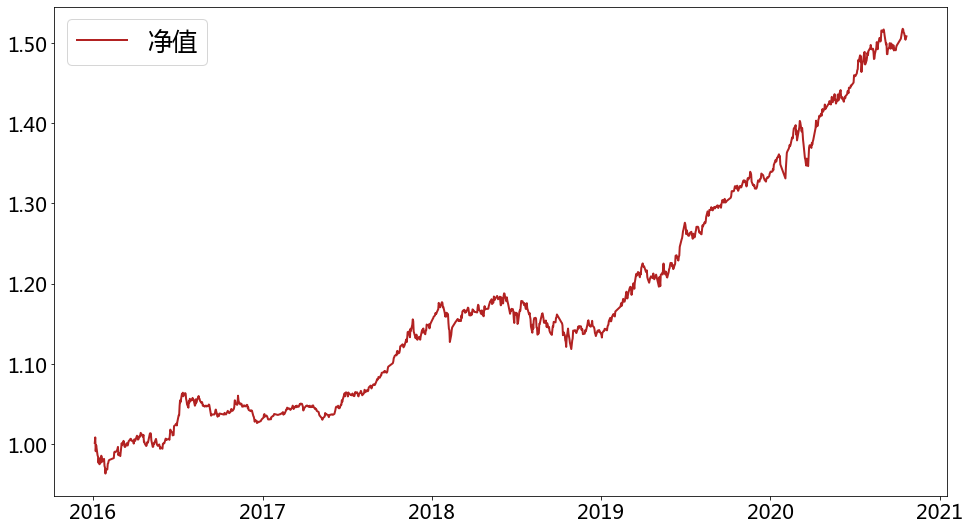

In [319]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((1 + pf_ret_2575).cumprod(), label='净值', color='firebrick', linewidth=2)

ax.legend(fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

# _ = ax.set_title('平衡型组合历史回测', fontsize=35, y=1.02)

In [320]:
metric(pf_ret_2575)

0.09281689246731073
0.05737472604610053
-0.05845494986308696
1.5772685590554234


In [312]:
metric(pf_ret_46)

0.1185945964239381
0.0815816734023726
-0.08266790788740906
1.4160467240906784


In [313]:
metric(pf_ret_19)

0.05849376635257575
0.020913380279496414
-0.018988425388889667
2.731295071688877


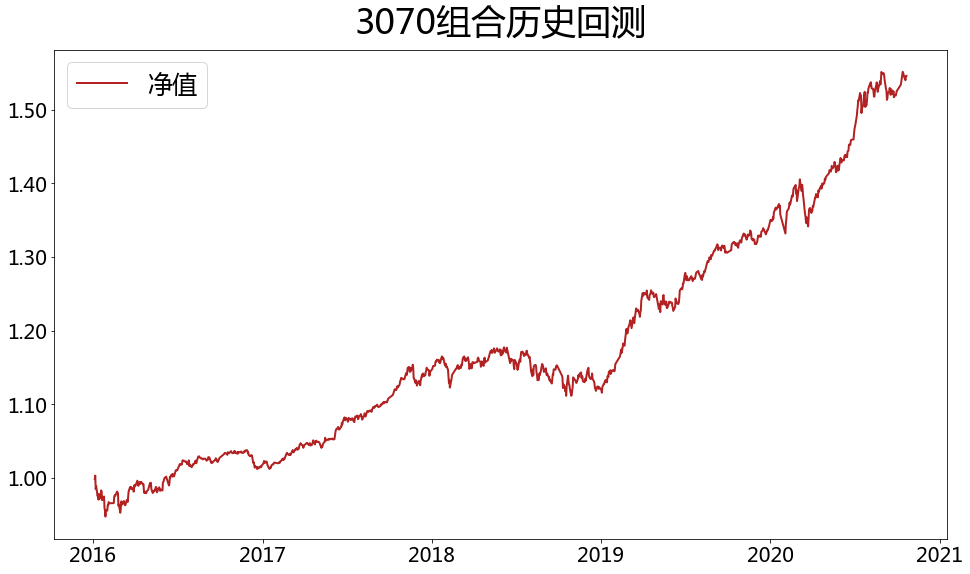

In [323]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((1 + pf_ret_37).cumprod(), label='净值', color='firebrick', linewidth=2)
# ax.plot((1 + pf_ret_55).cumprod(), label='平衡型', color='blue')
# ax.plot((1 + pf_ret_82).cumprod(), label='80/20组合', color='black')

ax.legend(fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

_ = ax.set_title('3070组合历史回测', fontsize=35, y=1.02)

In [324]:
metric(pf_ret_37)

0.09865537699097948
0.06116327132898419
-0.055995871703865004
1.5704824641915294
